In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
import os
import numpy as np
from keras_preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4 ,4 ,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features,labels
train_features, train_labels= extract_features(train_dir , 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
train_features = np.reshape(train_features, (2000, 4 *4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 *4 * 512))
test_features = np.reshape(test_features, (1000, 4 *4 * 512))

In [4]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim =4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features,train_labels,epochs=30,batch_size=20,
                     validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6277 - acc: 0.6480 - val_loss: 0.4411 - val_acc: 0.8450
Epoch 2/30
100/100 [==============================] - 4s 42ms/step - loss: 0.4344 - acc: 0.8015 - val_loss: 0.3625 - val_acc: 0.8780
Epoch 3/30
100/100 [==============================] - 4s 40ms/step - loss: 0.3650 - acc: 0.8370 - val_loss: 0.3239 - val_acc: 0.8850
Epoch 4/30
100/100 [==============================] - 4s 42ms/step - loss: 0.3155 - acc: 0.8675 - val_loss: 0.3008 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 4s 39ms/step - loss: 0.2902 - acc: 0.8815 - val_loss: 0.2870 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 4s 39ms/step - loss: 0.2629 - acc: 0.8980 - val_loss: 0.2779 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 4s 40ms/step - loss: 0.2547 - acc: 0.9025 - val_loss: 0.2684 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 4s 39ms/step - 

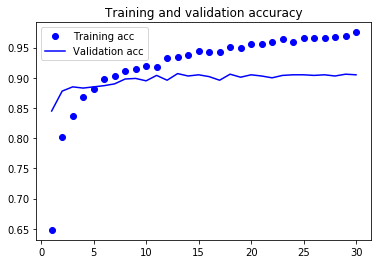

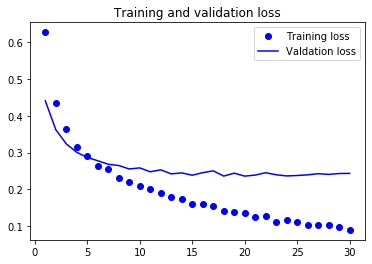

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation ='relu'))
model.add(layers.Dense(1,activation ='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,
                                  shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                   validation_steps=50,verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in  con_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable = True:
        layer.trainable = True
    else:
        layer.trainable = False`

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])
history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
                   validation_steps=50)

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
        return smoothed_points
    
    plt.plot(epochs,smooth_curve(acc),'bo' , labels ='Smoothed training acc')
    plt.plot(epochs,smooth_curve(val_acc),'bo' , labels ='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs,smooth_curve(loss),'bo', label='Smoothed trainig loss')
    plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training a')